# Riešenie pre Prieskumnú analýzu dát 37 - Márk Bartalos, Daniela Paľuchová

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Súbory

In [76]:
products = pd.read_csv("data/product.csv", sep='\t')
sessions = pd.read_csv("data/session.csv", sep='\t')
users = pd.read_csv("data/user.csv", sep='\t')


### Zlúčenie dátových súborov

Chceme pripojiť množinu údajov používateľov k údajom o reláciách:

In [77]:
combined = sessions.join(users.set_index('user_id'),on='user_id', how='left')

In [78]:
combined.head()

pct_wild_mouse screen_height  pct_input  pct_scrandom  pct_scroll_move  \
0        33.93175           600    2.02433      47.57172         77.67966   
0        33.93175           600    2.02433      47.57172         77.67966   
1        35.01962           768    2.73613      44.98978         40.38256   
1        35.01962           768    2.73613      44.98978         40.38256   
1        35.01962           768    2.73613      44.98978         40.38256   

   pct_click_product_info  wild_mouse_duration        session_start  \
0                50.06169             16.15405  2022-04-16 18:13:19   
0                50.06169             16.15405  2022-04-16 18:13:19   
1                53.78582             16.44725  2022-09-07 09:34:07   
1                53.78582             16.44725  2022-09-07 09:34:07   
1                53.78582             16.44725  2022-09-07 09:34:07   

   total_load_time  pct_click  ...         username  \
0          3.66109   15.21849  ...        dteixeira   
0          3.66109   15.21849  ...        westholly   
1          3.06183   17.79744  ...        ptreccani   
1          3.06183   17.79744  ...        ryoheiito   
1          3.06183   17.79744  ...  giuseppinabarth   

                                    residence  \
0                                         NaN   
0  69785 Brenda Hollow\nWest Brandi, AL 29408   
1                                         NaN   
1                                         NaN   
1                                         NaN   

                                   current_location             name  \
0      (Decimal('65.429204'), Decimal('27.147097'))     Rebeca Silva   
0     (Decimal('-74.5507745'), Decimal('2.339005'))   Patrick Vargas   
1   (Decimal('-65.9975475'), Decimal('-33.607602'))  Daria Boccaccio   
1  (Decimal('-59.9246355'), Decimal('-119.343543'))            西村 陽子   
1    (Decimal('40.4064215'), Decimal('-76.044164'))       Timm Klemm   

                      mail                         job  sex   race  \
0   danielsouza@bol.com.br    Lubrificador de máquinas  NaN    NaN   
0       qjimenez@yahoo.com                         NaN  NaN    NaN   
1  francescapiane@alice.it  Sports development officer    F    NaN   
1         iikeda@yahoo.com                      高等学校教員    F    NaN   
1         vincent64@aol.de               Programmierer  NaN  black   

                                             address   birthdate  
0  Sítio da Luz, 777\nCarmo\n54487013 Silveira Ve...  1988-07-17  
0  0012 Gardner Lock Apt. 697\nLake Connorville, ...         NaN  
1  Stretto Cammarata, 48 Appartamento 9\n44122, F...  2016-12-07  
1                      熊本県八千代市元浅草40丁目9番2号 山中新田パレス114  1951-05-30  
1              Kaspar-Heydrich-Platz 1\n02078 Kyritz  1939-05-05  

[5 rows x 35 columns]

In [79]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15296 entries, 0 to 11093
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  15284 non-null  float64
 1   screen_height                   15296 non-null  object 
 2   pct_input                       15284 non-null  float64
 3   pct_scrandom                    15282 non-null  float64
 4   pct_scroll_move                 15282 non-null  float64
 5   pct_click_product_info          15282 non-null  float64
 6   wild_mouse_duration             15278 non-null  float64
 7   session_start                   15296 non-null  object 
 8   total_load_time                 15296 non-null  float64
 9   pct_click                       15281 non-null  float64
 10  screen_width                    15296 non-null  object 
 11  pct_doubleclick                 15277 non-null  float64
 12  product_ean                     15296

In [80]:
combined.describe()

pct_wild_mouse     pct_input  pct_scrandom  pct_scroll_move  \
count    15284.000000  15284.000000  15282.000000     15282.000000   
mean        52.691826      3.860394     48.173547        46.114372   
std         11.302639      5.258542     12.421053        12.821068   
min          0.000000      0.000000      0.000000         0.000000   
25%         45.161192      1.102500     39.977797        37.731642   
50%         52.944115      2.289860     47.972670        46.256955   
75%         60.291488      4.587462     56.528312        54.714887   
max        100.000000    100.000000    100.000000       100.000000   

       pct_click_product_info  wild_mouse_duration  total_load_time  \
count            15282.000000         15278.000000     15296.000000   
mean                49.475762            16.267879         4.033504   
std                 12.372067             1.014367         2.835714   
min                  0.000000            12.680180         0.009100   
25%                 41.305030            15.571870         1.954425   
50%                 49.483845            16.273780         3.375020   
75%                 57.795880            16.956812         5.450577   
max                100.000000            20.023140        23.218750   

          pct_click  pct_doubleclick   product_ean  ...       user_id  \
count  15281.000000     15277.000000  1.529600e+04  ...  15296.000000   
mean      17.198884        14.576513  5.037980e+12  ...   1244.020594   
std        1.892520         1.517834  2.903571e+12  ...    712.660763   
min        9.637950         8.867820  4.696783e+08  ...      0.000000   
25%       15.997850        13.578750  2.541427e+12  ...    632.000000   
50%       17.536620        14.574630  5.038212e+12  ...   1247.000000   
75%       18.498970        15.590920  7.561477e+12  ...   1856.000000   
max       23.227590        20.025180  9.999067e+12  ...   2499.000000   

         session_id  pct_scroll_move_duration           ack  \
count  1.529600e+04              15283.000000  15296.000000   
mean   7.463141e+05                 16.271563      0.543933   
std    4.321103e+05                  2.167987      0.498082   
min    1.121000e+03                  9.984270      0.000000   
25%    3.750895e+05                 14.519235      0.000000   
50%    7.404800e+05                 16.188970      1.000000   
75%    1.119939e+06                 17.994620      1.000000   
max    1.499883e+06                 23.235320      1.000000   

       scroll_move_total_rel_distance  page_activity_duration  \
count                    15284.000000            15279.000000   
mean                        14.415097               16.261675   
std                          3.882336                0.999093   
min                          0.000000               12.253120   
25%                         11.744250               15.590285   
50%                         14.440890               16.263390   
75%                         17.168420               16.922215   
max                         27.442960               19.883820   

       mouse_move_total_rel_distance  pct_rage_click  session_duration  \
count                   15278.000000    15279.000000      15296.000000   
mean                       17.177686       53.224407        149.844123   
std                         1.984239       12.327209         59.687434   
min                         9.462320        0.000000        -80.853850   
25%                        15.898925       44.783075        110.116512   
50%                        17.436780       53.186260        149.422370   
75%                        18.622152       61.678820        189.576992   
max                        23.501450      100.000000        401.202740   

       pct_mouse_click  
count     15280.000000  
mean         14.592097  
std           1.529178  
min           8.065100  
25%          13.544283  
50%          14.589835  
75%          15.619210  
max          21.278320  

[8 rows x 21 columns]

In [81]:
combined.dtypes

pct_wild_mouse                    float64
screen_height                      object
pct_input                         float64
pct_scrandom                      float64
pct_scroll_move                   float64
pct_click_product_info            float64
wild_mouse_duration               float64
session_start                      object
total_load_time                   float64
pct_click                         float64
screen_width                       object
pct_doubleclick                   float64
product_ean                         int64
pct_mouse_move                    float64
user_id                             int64
session_id                          int64
pct_scroll_move_duration          float64
ack                               float64
scroll_move_total_rel_distance    float64
page_activity_duration            float64
mouse_move_total_rel_distance     float64
browser_name                       object
pct_rage_click                    float64
session_duration                  

Zo štruktúry údajov vieme, že relácie a používatelia sú pravdepodobne príbuzní, pretože obaja majú stĺpce `user_id`, takže sme ich skombinovali pomocou `user_id`. Hoci údaje možno kombinovať vo väčšine štatistických analýz, nie je to potrebné, pretože väčšina relevantných údajov je obsiahnutá v súbore údajov o reláciách, niektoré informácie o používateľovi môžu byť užitočné, ako je pohlavie, poloha, ale kvôli nepravidelnosti týchto údajov vo väčšine výpočtov tieto údaje nebude používaný. Tiež vidíme, že relácia obsahuje aj cudzí kľúč `product_ean`, takže je možné spojiť aj údaje o produkte. Ale nebolo to spojené, pretože sa nezdá, že by to malo štatistickú významnosť.

## Štatistiky pre produkty

In [82]:
products.head()

code             location       store_name    product_ean
0   HR        Europe/Zagreb            Split  3618641987900
1   CN        Asia/Shanghai           Heyuan   890698872559
2   NL     Europe/Amsterdam        Barneveld  2447491624236
3   MX  America/Mexico_City           Tuxtla  2920947188549
4   US     America/New_York  Sun City Center  4869841703558

In [83]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14962 entries, 0 to 14961
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14948 non-null  object
 1   location     14962 non-null  object
 2   store_name   14962 non-null  object
 3   product_ean  14962 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 467.7+ KB


In [84]:
products.dtypes

code           object
location       object
store_name     object
product_ean     int64
dtype: object

In [85]:
products.describe()

product_ean
count  1.496200e+04
mean   5.056087e+12
std    2.886705e+12
min    4.120895e+08
25%    2.574982e+12
50%    5.058009e+12
75%    7.576357e+12
max    9.999214e+12

In [86]:
products.count()

code           14948
location       14962
store_name     14962
product_ean    14962
dtype: int64

## Štatistika relácie

In [87]:
sessions.head()

pct_wild_mouse screen_height  pct_input  pct_scrandom  pct_scroll_move  \
0        33.93175           600    2.02433      47.57172         77.67966   
1        35.01962           768    2.73613      44.98978         40.38256   
2        61.41151           800    2.30551      56.16179         29.32719   
3        44.86510           600    4.67376      51.02882         57.35852   
4        61.66559           800    6.29241      33.35663         50.05876   

   pct_click_product_info  wild_mouse_duration        session_start  \
0                50.06169             16.15405  2022-04-16 18:13:19   
1                53.78582             16.44725  2022-09-07 09:34:07   
2                61.74431             16.28032  2022-08-01 19:22:50   
3                44.10727             16.97307  2020-03-28 06:00:21   
4                36.03935             17.26692  2023-02-12 18:25:13   

   total_load_time  pct_click  ... session_id  pct_scroll_move_duration  ack  \
0          3.66109   15.21849  ...     341891                  17.64845  0.0   
1          3.06183   17.79744  ...    1302699                  16.90542  1.0   
2          4.30491   16.56530  ...    1346090                  20.42301  1.0   
3          2.66177   14.10738  ...     320000                  19.13251  0.0   
4          3.67287   19.04736  ...     291366                  13.65667  0.0   

   scroll_move_total_rel_distance  page_activity_duration  \
0                        13.31028                15.50704   
1                        18.33657                15.76245   
2                         7.24767                15.94806   
3                         9.27093                17.21545   
4                        19.71573                17.01892   

   mouse_move_total_rel_distance  browser_name  pct_rage_click  \
0                       16.78128        safari        73.88232   
1                       16.67535       firefox        36.27018   
2                       17.84916         opera        44.07316   
3                       15.85436          edge        61.91555   
4                       16.65385        chrome        21.36066   

   session_duration  pct_mouse_click  
0          93.50794              NaN  
1          83.05534         15.63971  
2         212.16973         13.54653  
3          62.13615         14.83673  
4         157.60814         15.17088  

[5 rows x 25 columns]

Tu môžeme vidieť základnú štruktúru údajov o reláciách

In [88]:
sessions.dtypes

pct_wild_mouse                    float64
screen_height                      object
pct_input                         float64
pct_scrandom                      float64
pct_scroll_move                   float64
pct_click_product_info            float64
wild_mouse_duration               float64
session_start                      object
total_load_time                   float64
pct_click                         float64
screen_width                       object
pct_doubleclick                   float64
product_ean                         int64
pct_mouse_move                    float64
user_id                             int64
session_id                          int64
pct_scroll_move_duration          float64
ack                               float64
scroll_move_total_rel_distance    float64
page_activity_duration            float64
mouse_move_total_rel_distance     float64
browser_name                       object
pct_rage_click                    float64
session_duration                  

Vidíme dáta z relácie, s ktorými môžeme pracovať. Vidíme, že `ack` je typu float. Užitočné informácie sú pre nás `session_id`, ktoré potom možno použiť na zoskupenie výsledkov.

In [89]:
sessions.describe()

pct_wild_mouse     pct_input  pct_scrandom  pct_scroll_move  \
count    11083.000000  11083.000000  11083.000000     11083.000000   
mean        52.648139      3.803649     48.199461        46.135119   
std         11.230331      5.014442     12.435101        12.872627   
min          0.000000      0.000000      0.000000         0.000000   
25%         45.140475      1.107265     39.905510        37.686685   
50%         52.931850      2.294230     48.133300        46.238390   
75%         60.268910      4.561370     56.574765        54.804880   
max        100.000000    100.000000    100.000000       100.000000   

       pct_click_product_info  wild_mouse_duration  total_load_time  \
count            11083.000000         11083.000000     11094.000000   
mean                49.435683            16.264905         4.027537   
std                 12.421234             1.008102         2.819824   
min                  0.000000            12.680180         0.009100   
25%                 41.221105            15.575645         1.959313   
50%                 49.380050            16.275950         3.385275   
75%                 57.769000            16.950055         5.437817   
max                100.000000            20.023140        23.218750   

          pct_click  pct_doubleclick   product_ean  ...       user_id  \
count  11083.000000     11081.000000  1.109400e+04  ...  11094.000000   
mean      17.188308        14.563180  5.032917e+12  ...   1244.584009   
std        1.885194         1.515884  2.899916e+12  ...    716.904975   
min        9.637950         8.867820  4.696783e+08  ...      0.000000   
25%       15.996600        13.562350  2.542907e+12  ...    619.000000   
50%       17.526550        14.564720  5.036333e+12  ...   1247.000000   
75%       18.485405        15.569400  7.541976e+12  ...   1853.000000   
max       23.227590        20.025180  9.999067e+12  ...   2499.000000   

         session_id  pct_scroll_move_duration           ack  \
count  1.109400e+04              11082.000000  11094.000000   
mean   7.464349e+05                 16.275561      0.547503   
std    4.320103e+05                  2.170240      0.497761   
min    1.121000e+03                  9.984270      0.000000   
25%    3.754432e+05                 14.531152      0.000000   
50%    7.410480e+05                 16.198430      1.000000   
75%    1.118559e+06                 17.988220      1.000000   
max    1.499883e+06                 23.235320      1.000000   

       scroll_move_total_rel_distance  page_activity_duration  \
count                    11083.000000            11082.000000   
mean                        14.383866               16.259771   
std                          3.888057                0.992421   
min                          0.000000               12.253120   
25%                         11.702235               15.591965   
50%                         14.398810               16.263575   
75%                         17.110365               16.915835   
max                         27.442960               19.883820   

       mouse_move_total_rel_distance  pct_rage_click  session_duration  \
count                   11083.000000    11083.000000      11094.000000   
mean                       17.185601       53.189386        149.918809   
std                         1.981048       12.333659         59.929973   
min                         9.462320        0.000000        -80.853850   
25%                        15.914905       44.753915        110.215690   
50%                        17.442770       53.171720        149.994645   
75%                        18.615355       61.702065        189.810583   
max                        23.501450      100.000000        401.202740   

       pct_mouse_click  
count     11083.000000  
mean         14.579468  
std           1.541677  
min           8.065100  
25%          13.527780  
50%          14.587300  
75%          15.621170  
max          21.278320  

[8 rows x 21 columns]

In [90]:
sessions.count()

pct_wild_mouse                    11083
screen_height                     11094
pct_input                         11083
pct_scrandom                      11083
pct_scroll_move                   11083
pct_click_product_info            11083
wild_mouse_duration               11083
session_start                     11094
total_load_time                   11094
pct_click                         11083
screen_width                      11094
pct_doubleclick                   11081
product_ean                       11094
pct_mouse_move                    11083
user_id                           11094
session_id                        11094
pct_scroll_move_duration          11082
ack                               11094
scroll_move_total_rel_distance    11083
page_activity_duration            11082
mouse_move_total_rel_distance     11083
browser_name                      11094
pct_rage_click                    11083
session_duration                  11094
pct_mouse_click                   11083


Vidíme, že pri niektorých prvkoch chýbajú stĺpce, bude to musieť byť zmiernené.

In [91]:
numeric_cols = sessions.select_dtypes(include=[np.number]).columns
session_numeric = sessions[numeric_cols]
session_numeric.corr()


pct_wild_mouse  pct_input  pct_scrandom  \
pct_wild_mouse                        1.000000  -0.010566     -0.005930   
pct_input                            -0.010566   1.000000     -0.001720   
pct_scrandom                         -0.005930  -0.001720      1.000000   
pct_scroll_move                      -0.013117  -0.001320      0.012526   
pct_click_product_info                0.002614   0.007180     -0.015380   
wild_mouse_duration                  -0.019128   0.771646     -0.005581   
total_load_time                      -0.000499   0.002169     -0.002988   
pct_click                            -0.012769   0.000415      0.005094   
pct_doubleclick                       0.006908   0.000654     -0.007074   
product_ean                          -0.008520   0.010486      0.000138   
pct_mouse_move                       -0.013528   0.001336      0.013812   
user_id                               0.001262   0.000987      0.008533   
session_id                           -0.016265   0.006035     -0.010799   
pct_scroll_move_duration              0.002566  -0.002715     -0.003939   
ack                                  -0.010798  -0.002890      0.004934   
scroll_move_total_rel_distance       -0.012804  -0.001231      0.009358   
page_activity_duration                0.004480   0.010778      0.005594   
mouse_move_total_rel_distance        -0.003296   0.002932      0.003332   
pct_rage_click                       -0.007885  -0.015208      0.000926   
session_duration                     -0.011341   0.005173      0.005704   
pct_mouse_click                      -0.011969  -0.008617      0.007465   

                                pct_scroll_move  pct_click_product_info  \
pct_wild_mouse                        -0.013117                0.002614   
pct_input                             -0.001320                0.007180   
pct_scrandom                           0.012526               -0.015380   
pct_scroll_move                        1.000000               -0.009027   
pct_click_product_info                -0.009027                1.000000   
wild_mouse_duration                   -0.002261                0.000994   
total_load_time                       -0.010750               -0.006601   
pct_click                              0.007473                0.006051   
pct_doubleclick                        0.000345                0.001221   
product_ean                           -0.015696                0.007085   
pct_mouse_move                         0.001929               -0.005741   
user_id                                0.010153               -0.004956   
session_id                             0.006359               -0.011062   
pct_scroll_move_duration              -0.001515               -0.007079   
ack                                    0.013455                0.007639   
scroll_move_total_rel_distance         0.005756                0.005911   
page_activity_duration                 0.010123               -0.003901   
mouse_move_total_rel_distance          0.004221                0.009448   
pct_rage_click                         0.000860                0.008057   
session_duration                       0.002153                0.001434   
pct_mouse_click                        0.001846               -0.000955   

                                wild_mouse_duration  total_load_time  \
pct_wild_mouse                            -0.019128        -0.000499   
pct_input                                  0.771646         0.002169   
pct_scrandom                              -0.005581        -0.002988   
pct_scroll_move                           -0.002261        -0.010750   
pct_click_product_info                     0.000994        -0.006601   
wild_mouse_duration                        1.000000        -0.003356   
total_load_time                           -0.003356         1.000000   
pct_click                                  0.000801        -0.000606   
pct_doubleclick                           -0.004138        -0.008807   
product_ea

V tejto tabuľke môžeme vidieť koreláciu medzi hodnotami, ako jedna hodnota ovplyvňuje druhú, čím vyššia bude korelácia, tým väčšia je šanca, že spolu súvisia. Tu sa pozrieme na to, ako každá hodnota koreluje s našou predpokladanou hodnotou `ack`.

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

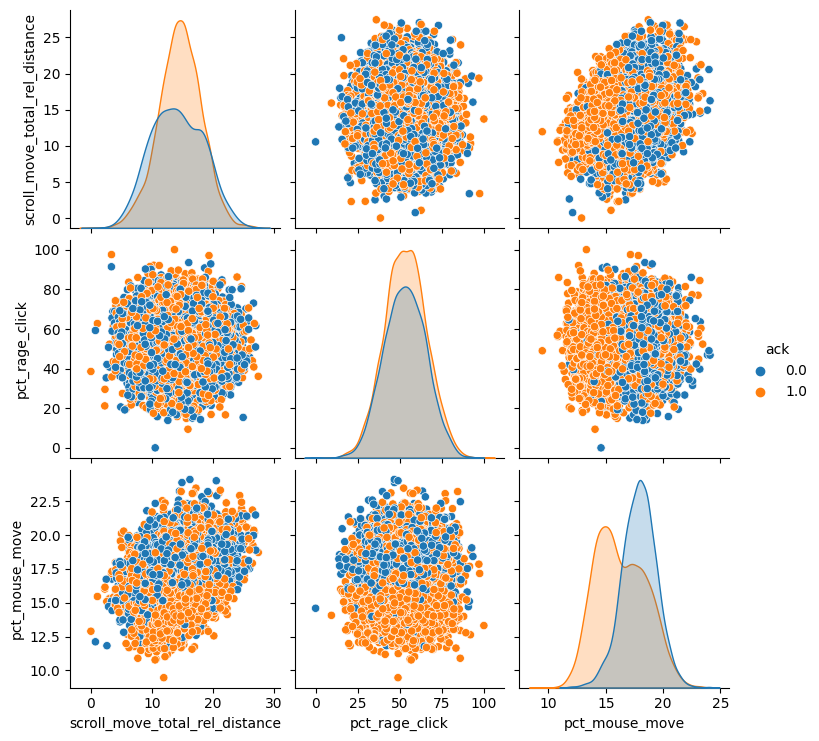

In [163]:
columns_to_plot = ['ack', 'scroll_move_total_rel_distance', 'pct_rage_click','pct_mouse_move']
df_no_duplicates = combined.drop_duplicates(subset=columns_to_plot)

sns.pairplot(df_no_duplicates[columns_to_plot], hue="ack")

From here we can see how each columns is related to each other and how they affect the `ack` value. We can see that higher amount of scrolling and lower amount of mouse movement has a positive effect on the `ack` value.

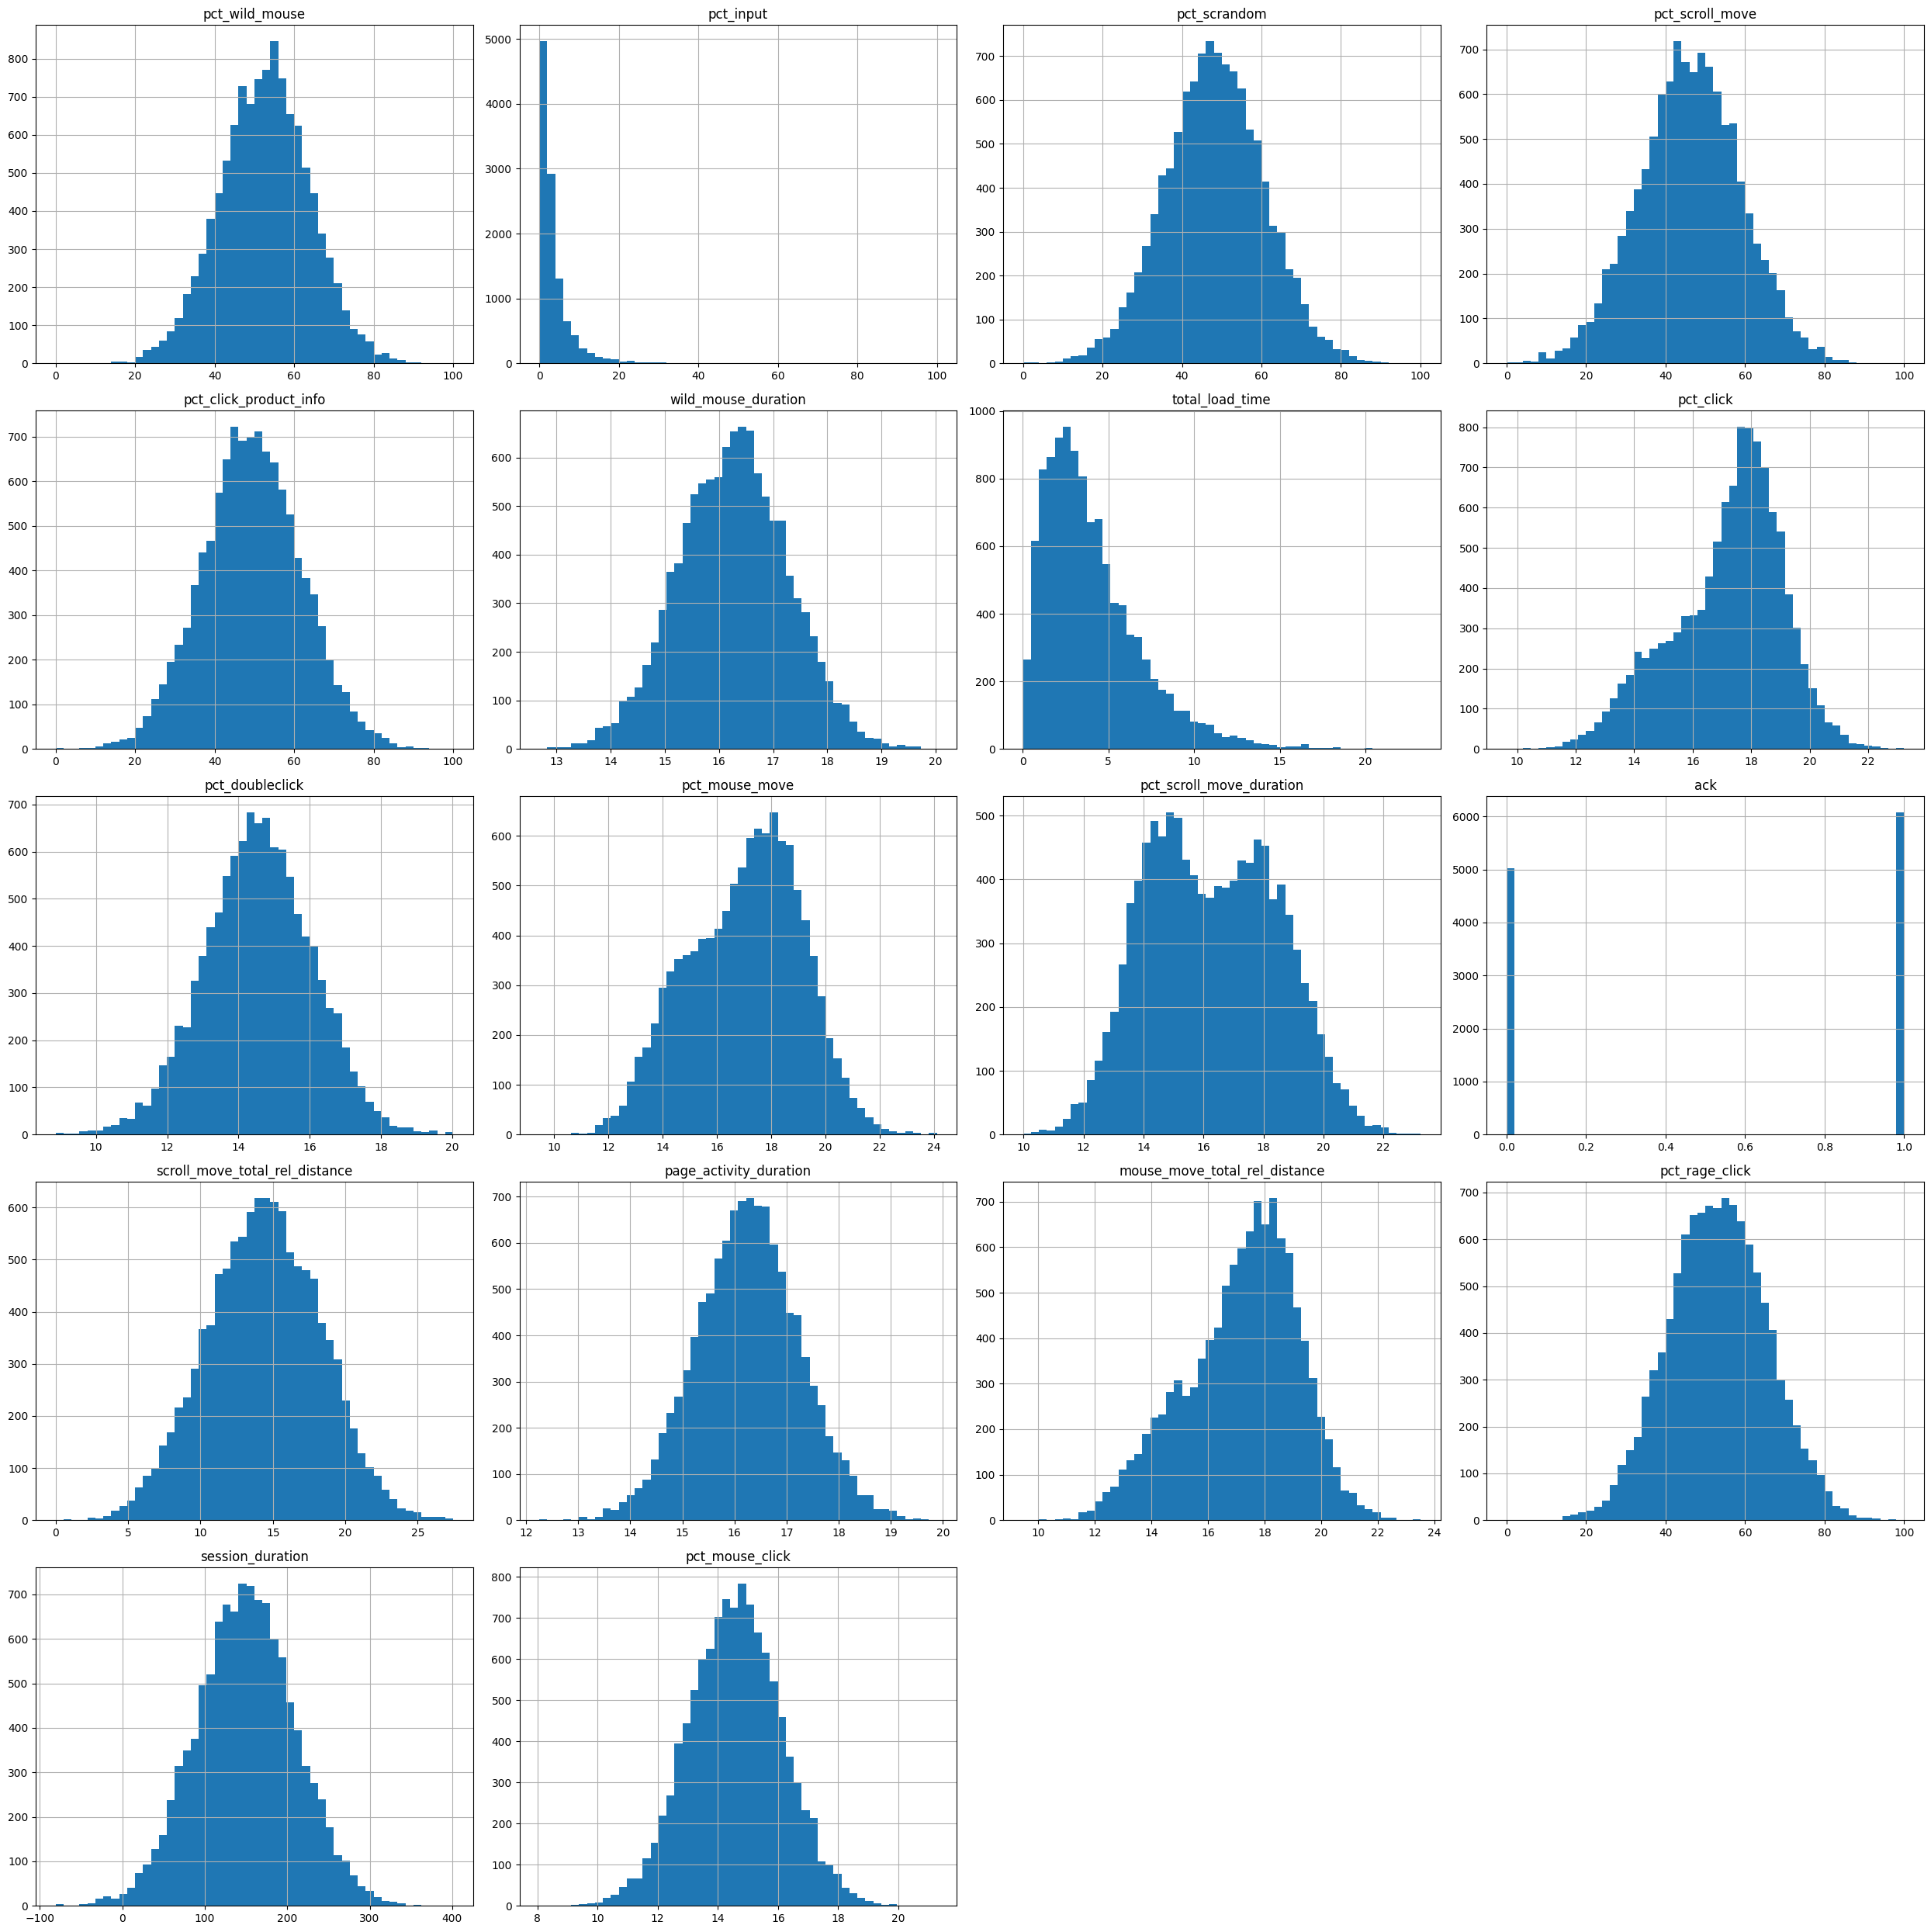

In [93]:
sessions.hist(column=sessions.drop(columns=['user_id','session_id','product_ean']).columns,figsize=(25,25), bins=50)
plt.tight_layout()
plt.show()

Tu vidíme rozdelenie hodnôt. Nezahrnuli sme stĺpce ean produktu, ID používateľa a ID relácie, pretože ide o svojvoľne generované čísla a nemajú žiadnu štatistickú významnosť.

Text(0.5, 1.0, 'Correlation Heatmap')

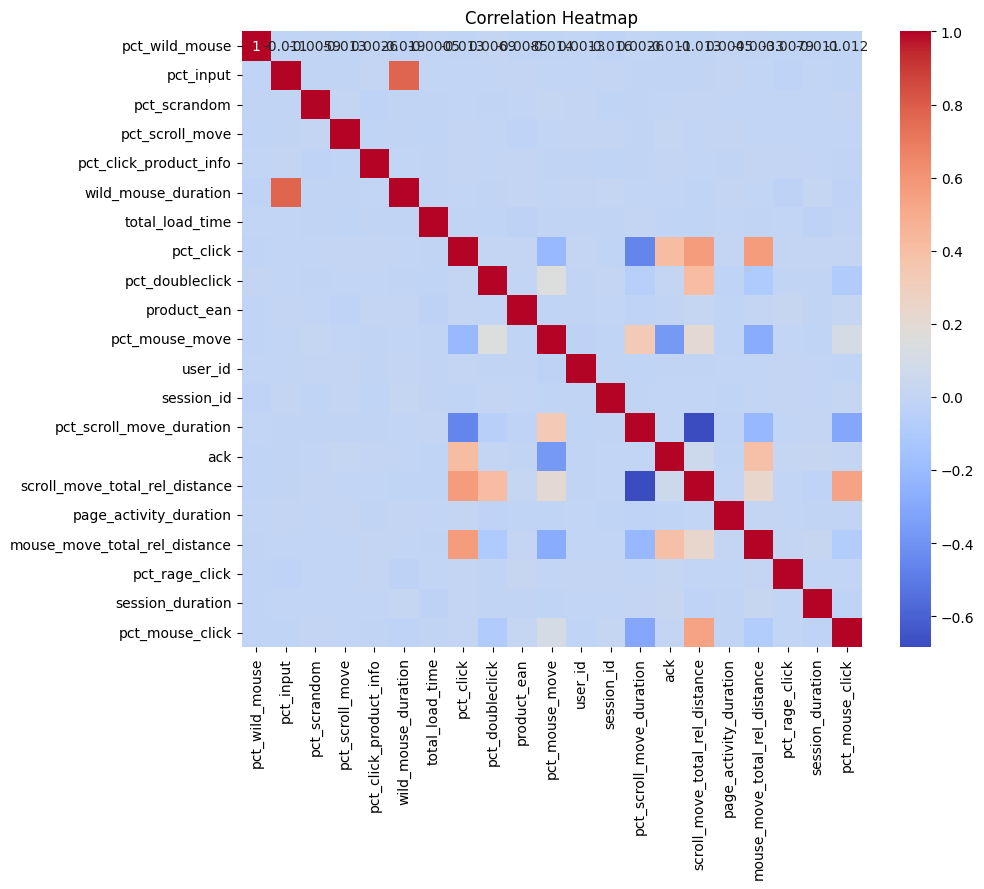

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(session_numeric.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')

Z teplotnej mapy môžeme vidieť, že existujú korelácie medzi stĺpcami `pct_click` a `scroll_move_total_rel_distance`, a tiež medzi pct_click a `mouse_move_total_rel_distance`. Ďalej je silná korelácia medzi `wild_mouse_duration` a `scroll_move_total_rel_distance`. Na predpovedanie, či používateľ klikne na produkt, by sa tieto stĺpce mohli použiť.

Existujú aj páry stĺpcov, ako napríklad ack a `pct_click`, `scroll_move_total_rel_distance` a `pct_doubleclick`, `pct_mouse_move` a `pct_scroll_move_duration`, ktoré tiež vykazujú určitú vzájomnú koreláciu.

Môžeme pozorovať negatívnu koreláciu medzi stĺpcami `scroll_move_total_rel_distance` a `pct_scroll_move_duration`.

array([[<Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'wild_mouse_duration'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_doubleclick'}>,
        <Axes: title={'center': 'pct_input'}>],
       [<Axes: title={'center': 'session_duration'}>, <Axes: >, <Axes: >]],
      dtype=object)

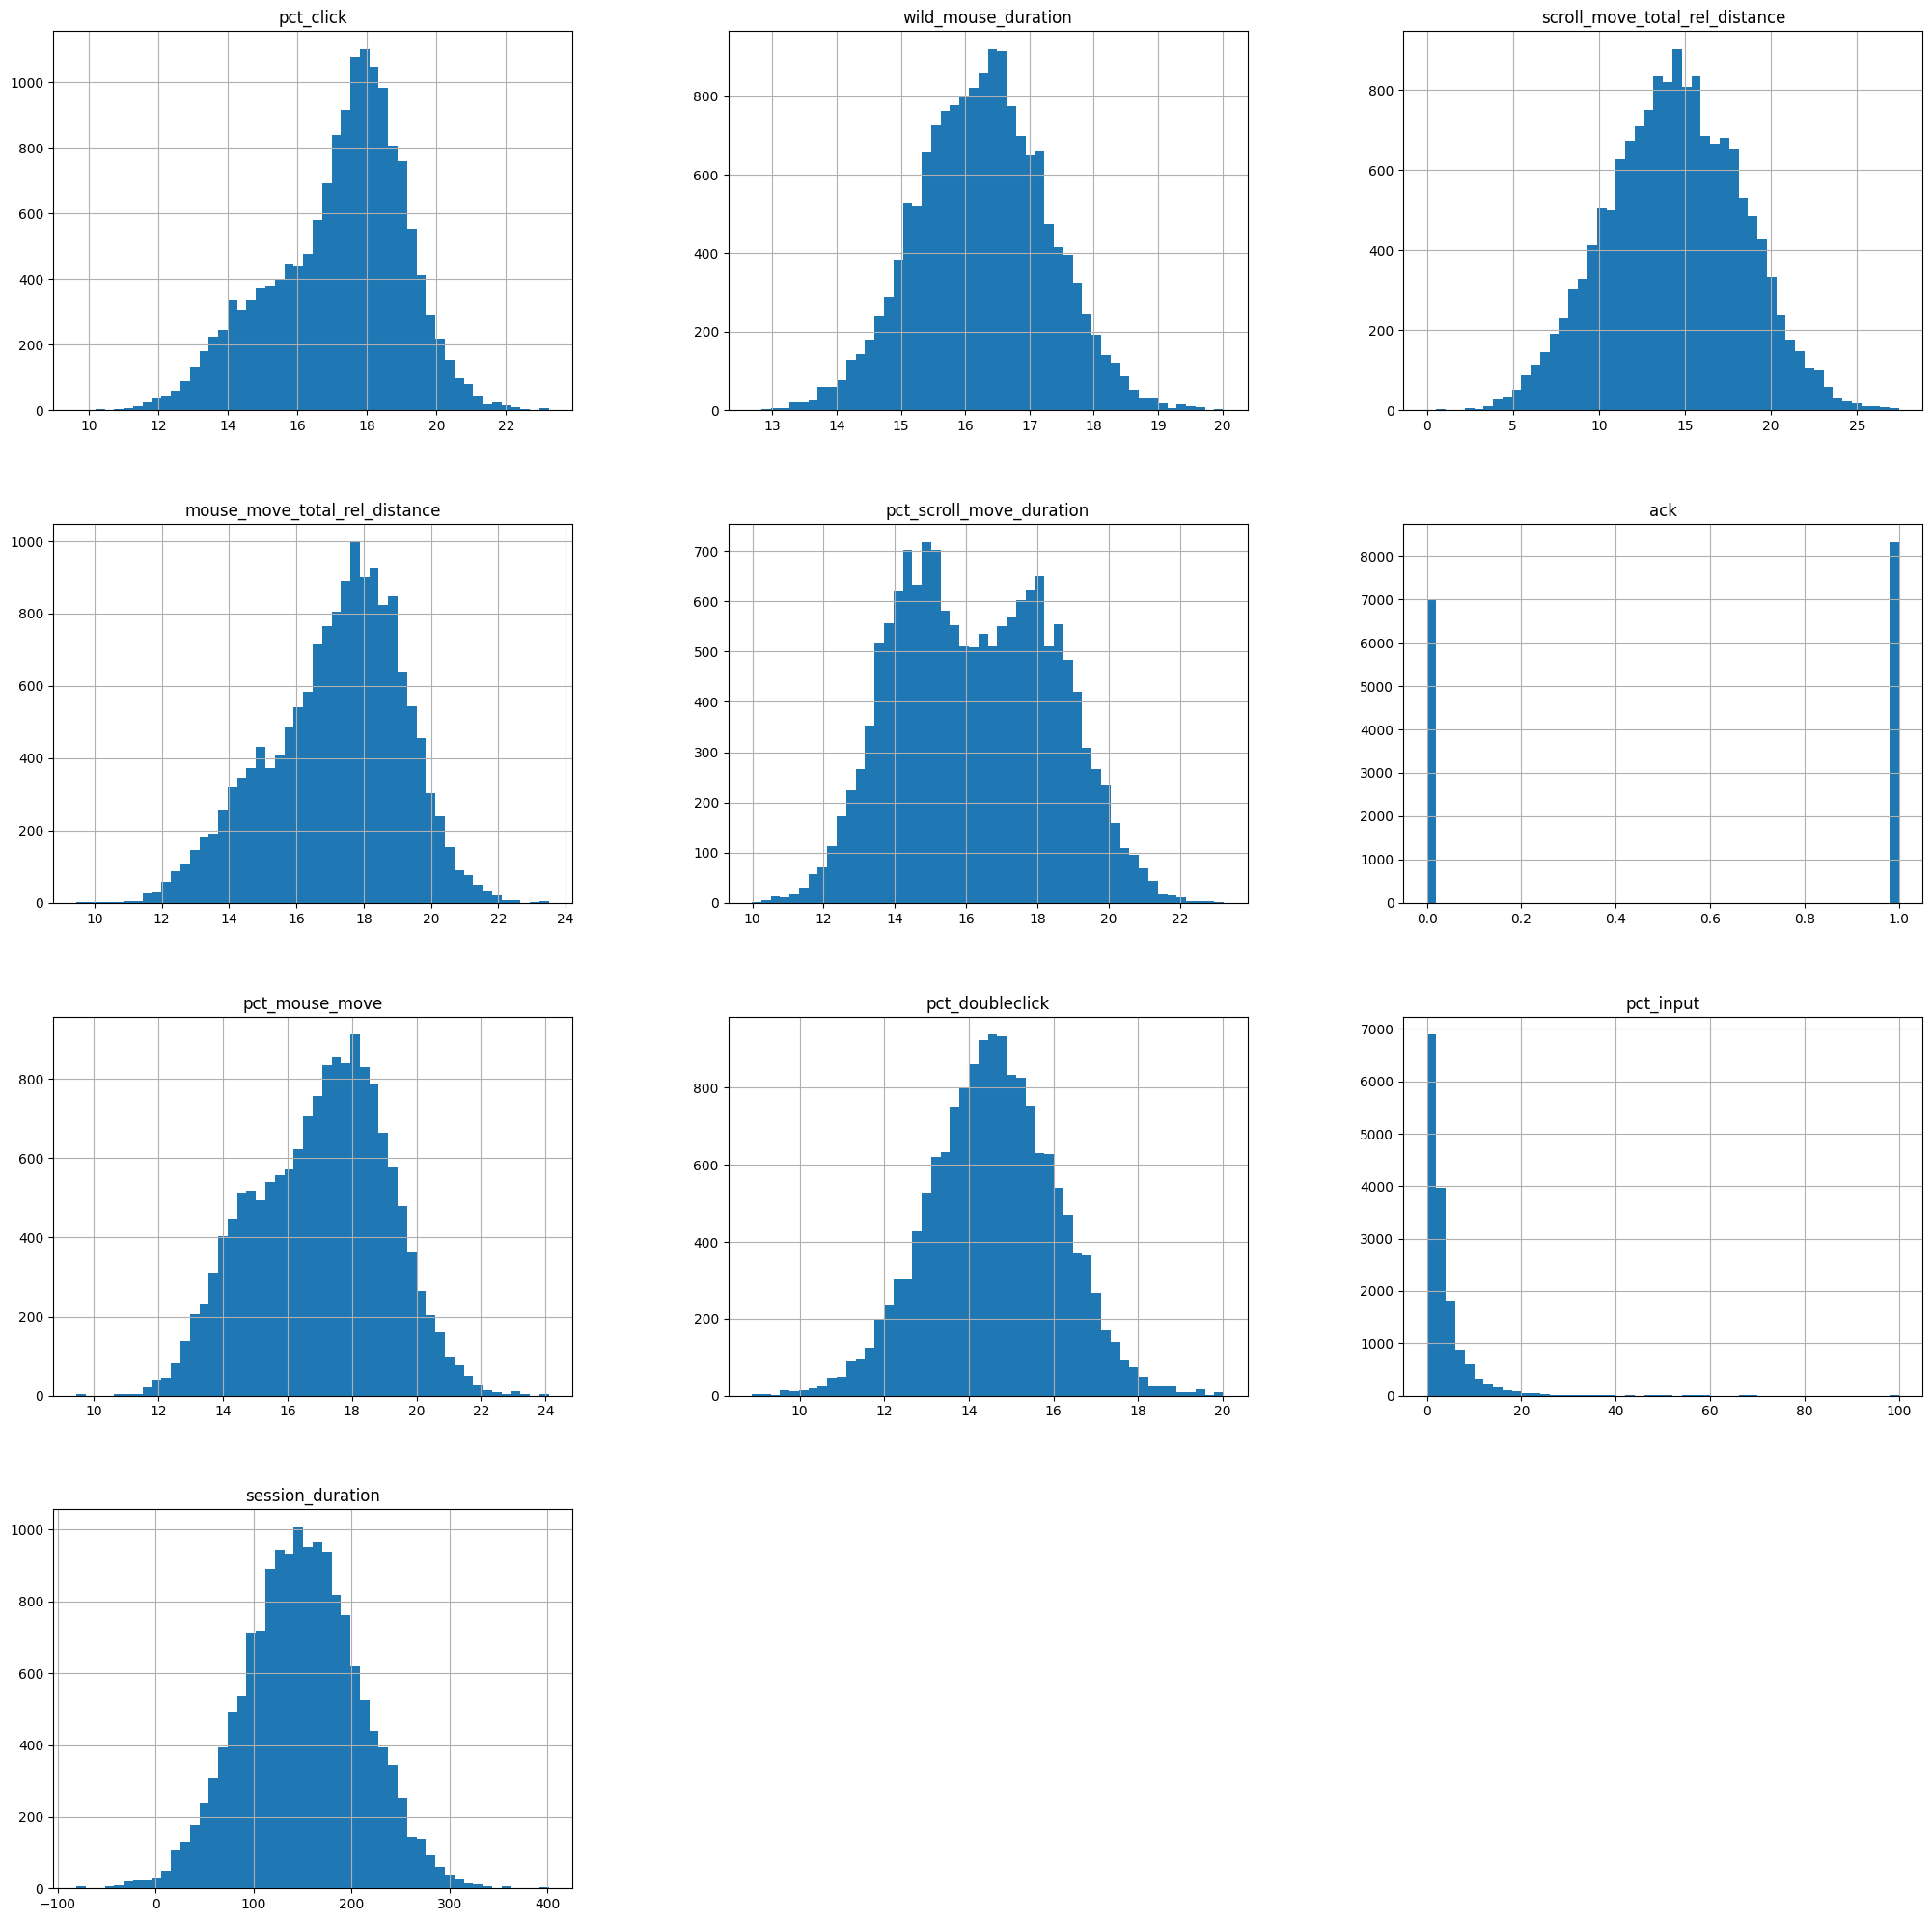

In [95]:
important_columns = ['pct_click','wild_mouse_duration',
'scroll_move_total_rel_distance','mouse_move_total_rel_distance',
'pct_scroll_move_duration','ack','pct_mouse_move', 'pct_doubleclick','pct_input', 'session_duration']
combined.hist(column=important_columns,figsize=(25,25), bins=50)

Tu je rozdelenie hodnôt, ktoré sme považovali za dôležité.

## Korelácia medzi dôležitými stĺpcami pre predikciu

<Axes: >

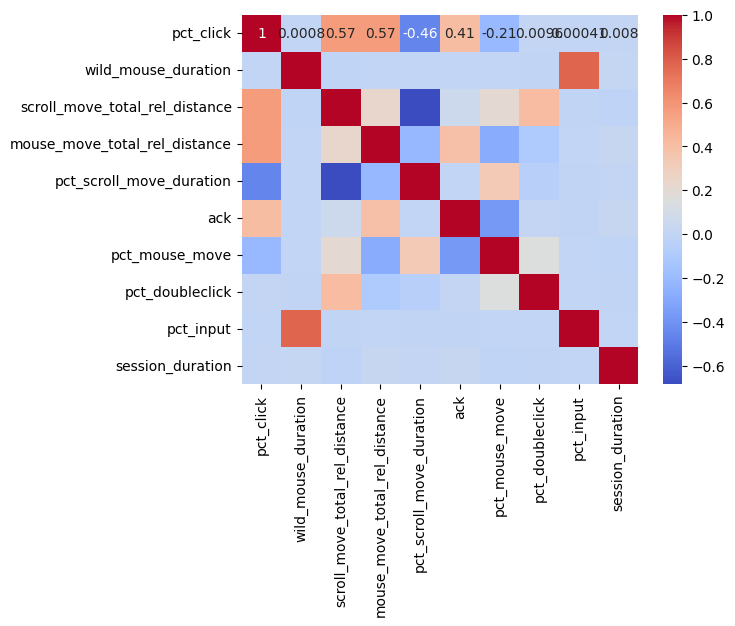

In [96]:
sns.heatmap(sessions[important_columns].corr(), annot=True, cmap='coolwarm')

áto teplotná mapa lepšie ukazuje, ako sú naše dôležité hodnoty navzájom korelované.

### Pairplot pre predpokladanú hodnotu a ďalšie dôležité stĺpce

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

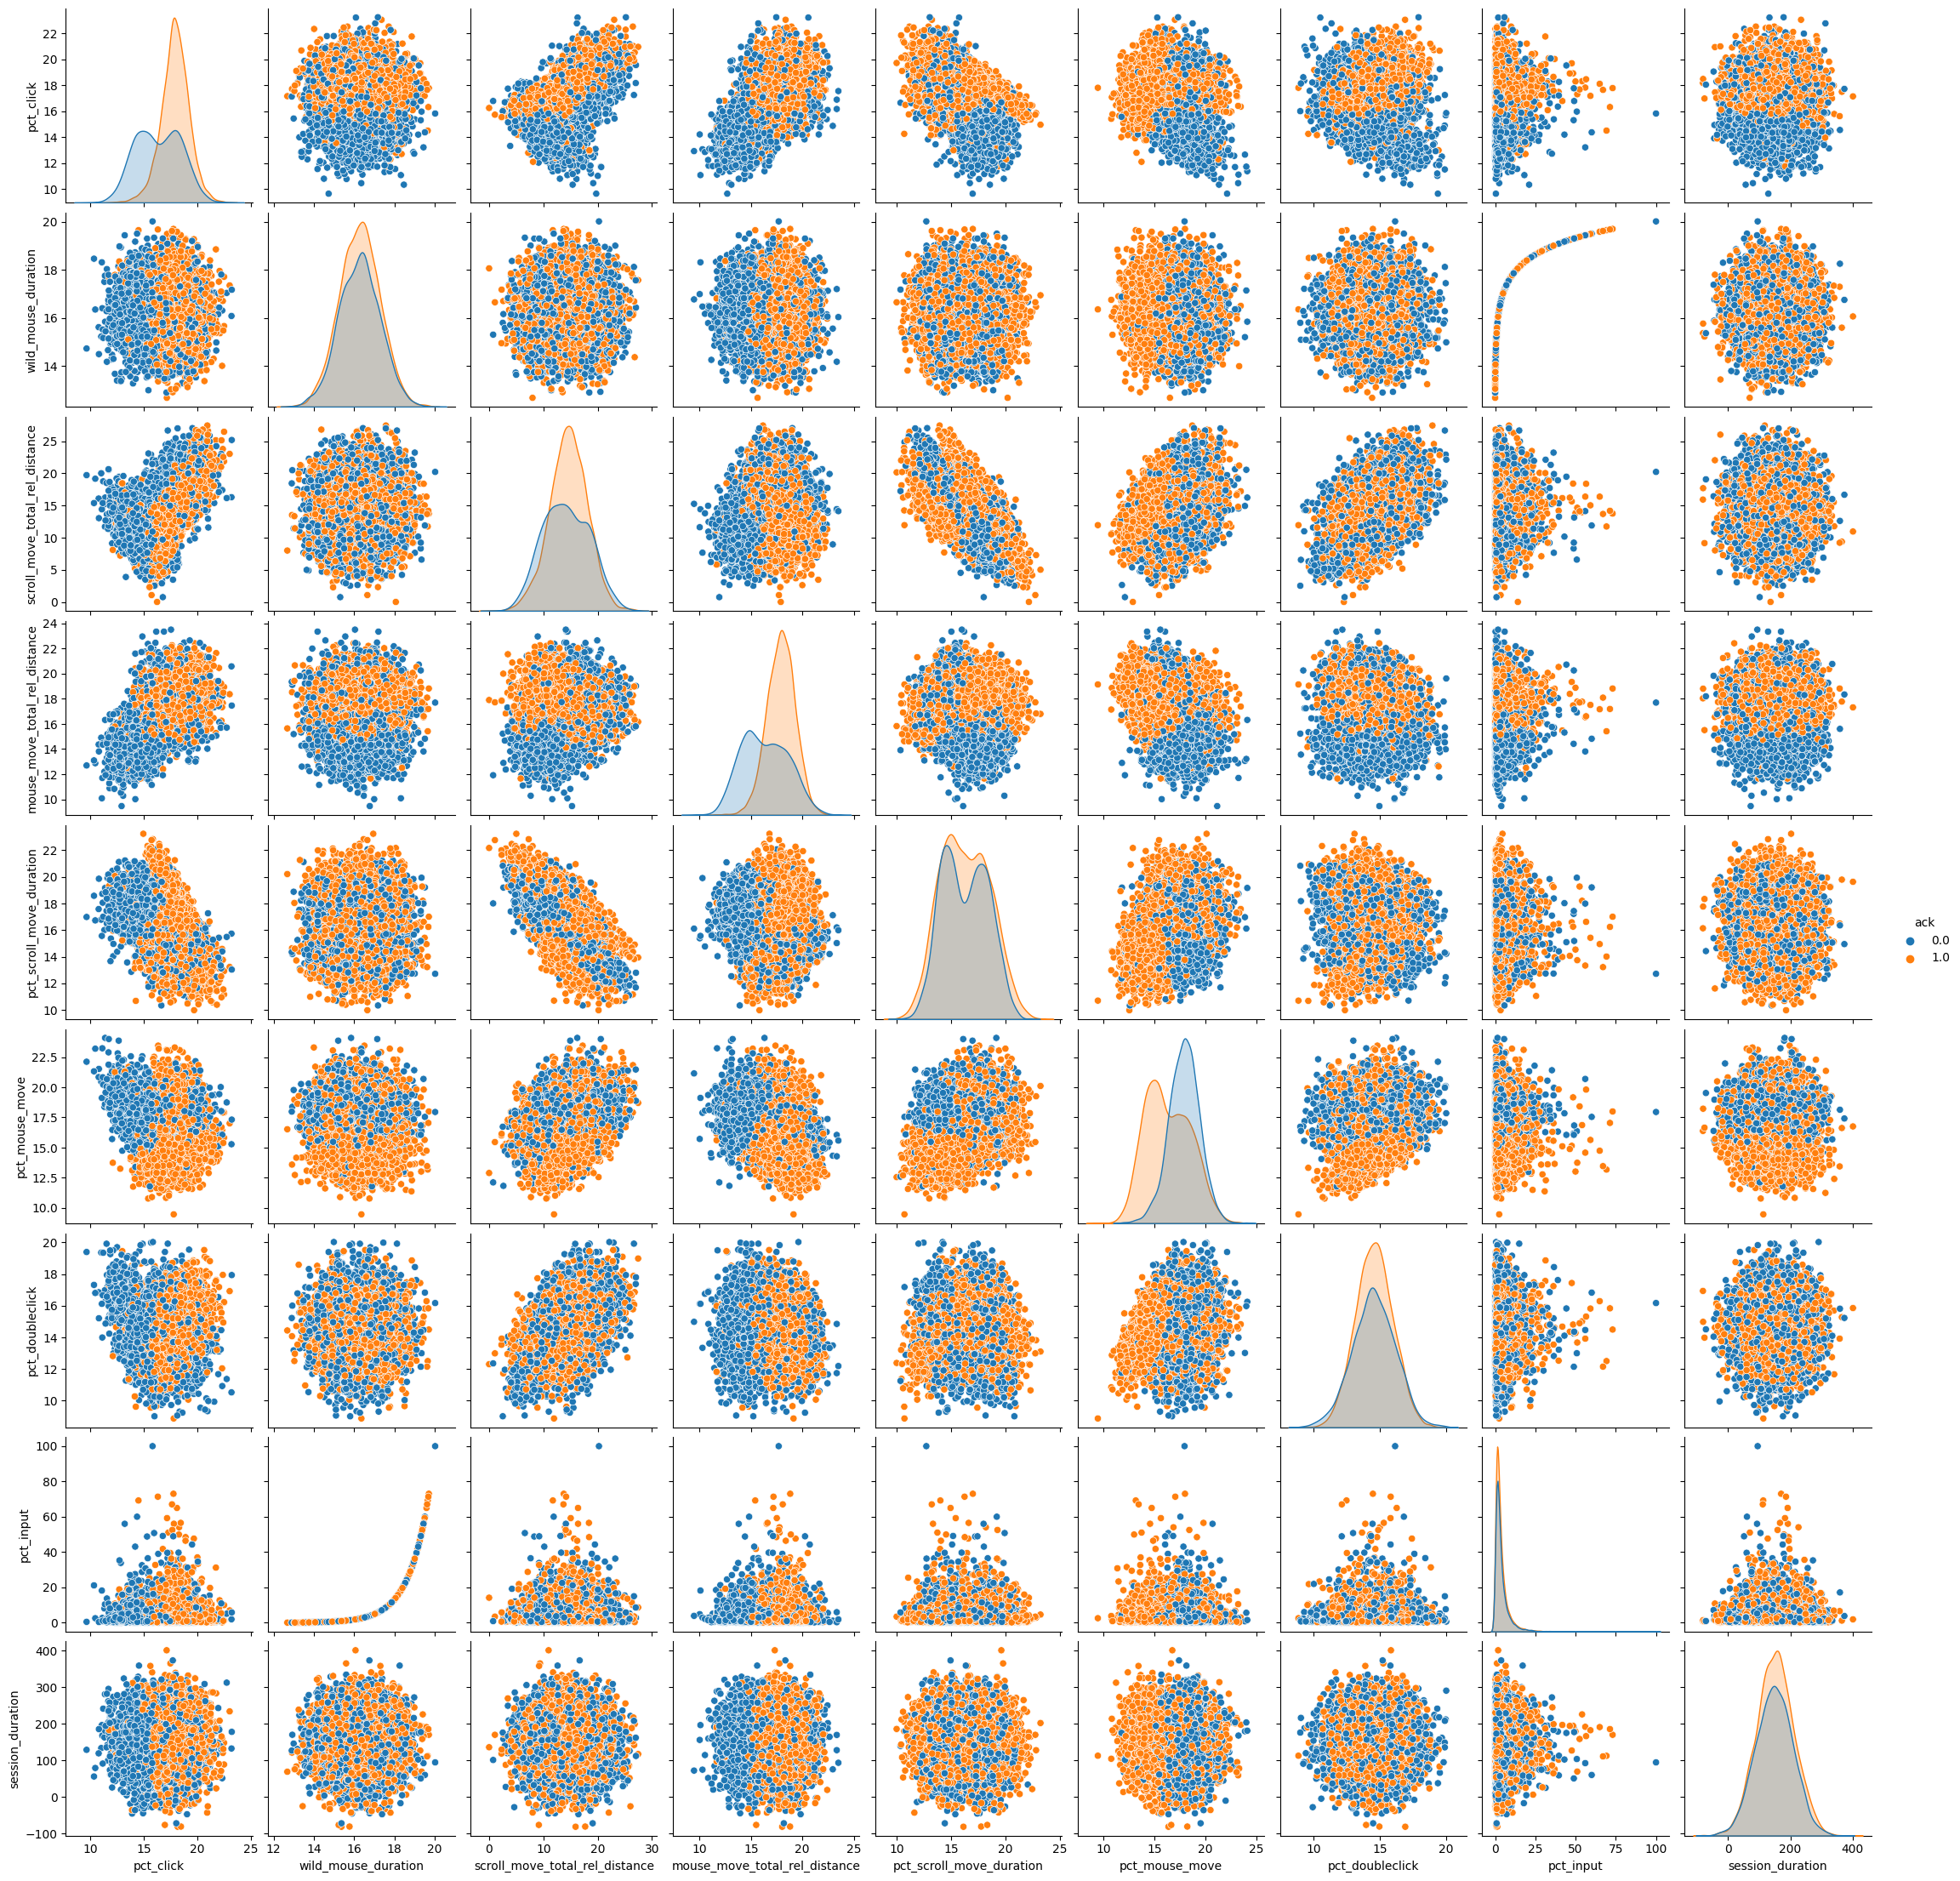

In [97]:
sns.pairplot(sessions[important_columns].dropna(), hue="ack")

Tu môžeme žltou farbou vidieť, ktoré aktoíny viedli k „ack“ a ako sa navzájom ovplyvňujú. Vidíme, že čím vyššia je `mouse_move_total_rel_distance`, tým vyššia je šanca kliknúť na produkt. Alebo napríklad môžeme vidieť, že `session_duration` výrazne neovplyvňuje hodnotu `ack`. Ale nižšie hodnoty (medzi 10 % a 16 %) `pct_mouse_move` a `pct_click` okolo 15 % viedli k oveľa vyššej šanci na výber produktu. Mohli by sme ich použiť na založenie našej hypotézy.

# Statistics for users

In [98]:
users.head()

username residence  \
0  gabrieladas-neves       NaN   
1      ferreirajulia       NaN   
2          isadora80       NaN   
3          adriana04       NaN   
4          kellygreg       NaN   

                                 current_location                  name  \
0   (Decimal('-37.802134'), Decimal('79.453092'))        Sabrina da Luz   
1    (Decimal('4.633756'), Decimal('102.063245'))  Maria Vitória Mendes   
2  (Decimal('80.9854585'), Decimal('135.043616'))   Isabella Nascimento   
3  (Decimal('67.6271835'), Decimal('-41.336778'))           Daria Boldù   
4   (Decimal('39.336945'), Decimal('120.879401'))        Sandra Jenkins   

                             mail                     job  sex   race  \
0          xda-cunha@yahoo.com.br  Engenheiro aeronáutico  NaN    NaN   
1  catarinada-conceicao@gmail.com              Mãe social    F  black   
2     maria-sophiasouza@ig.com.br                     NaN  NaN    NaN   
3               ngaleati@alice.it                     NaN  NaN    NaN   
4          danieljordan@yahoo.com             Fine artist  NaN    NaN   

                                             address   birthdate  user_id  
0  Condomínio de Silva, 16\nNovo Ouro Preto\n6891...         NaN      640  
1  Campo Eloah Ribeiro, 66\nEstrela Do Oriente\n2...  1946-06-27     1222  
2  Viela da Luz\nConjunto Santa Maria\n92354128 A...  1940-12-01      298  
3     Vicolo Sophia, 452 Piano 7\n26843, Meleti (LO)  1958-02-01      316  
4  31740 Maria Stravenue Apt. 240\nLake Rodneyfur...  1997-05-26     1992

In [99]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          2538 non-null   object
 1   residence         888 non-null    object
 2   current_location  2411 non-null   object
 3   name              2538 non-null   object
 4   mail              2538 non-null   object
 5   job               1015 non-null   object
 6   sex               1269 non-null   object
 7   race              761 non-null    object
 8   address           2157 non-null   object
 9   birthdate         1396 non-null   object
 10  user_id           2538 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 218.2+ KB


In [100]:
users.dtypes

username            object
residence           object
current_location    object
name                object
mail                object
job                 object
sex                 object
race                object
address             object
birthdate           object
user_id              int64
dtype: object

Vidíme, že dátovým typom stĺpcov sú takmer všetky objekty, čo znamená, že dáta sú buď reťazce, alebo nie sú konzistentné s niektorými chýbajúcimi informáciami.

In [101]:
users.count()

username            2538
residence            888
current_location    2411
name                2538
mail                2538
job                 1015
sex                 1269
race                 761
address             2157
birthdate           1396
user_id             2538
dtype: int64

Vidíme, že pre používateľov tu tiež chýbajú stĺpce, ale stĺpce user_id a username sú rovnaké a majú najvyšší počet, čo znamená, že každý používateľ má id

# Analýza chýb

**Identifikácia problémov v dátach s prvotným riešením**

**Nájdené chyby v datasete**<br />
*V datasete users:*<br />
1. V stlpci race sa nachádza hodnota "unspecified" a aj NaN, čo v tomto kontexte je to isté<br />
2. Dátum je vo formáte object, nie v dátumovom, aj ked sa to nepovažuje za chybu, plánujem to zmeniť kvôli jednoduchšej práci v budúcnosti s týmto atribútom<br />

*V datasete session*<br />
1. Stlpec ack je vo formáte float a nie int, čo je zbytočné
2. Nachádzajú sa tu duplikáty 
3. Dátum je vo formáte object, nie v dátumovom, aj ked sa to nepovažuje za chybu, plánujem to zmeniť kvôli jednoduchšej práci v budúcnosti s týmto atribútom 

*V datasete products som nenašla žiadne*

**Nájdené chyby, ale zatiaľ to nepotrebujeme meniť alebo je ich zbytočné meniť**

1. Adresa v datasete users je v rôzdnych formátoch, pretože že užívatelia sú z rôzdnych krajín = nepoužiteľný atribút, rovnako atribút residence
2. V datasete products v určitých záznamoch je atribút code NaN, preto bude ťažšie a nepresnejšie určiť, či niektoré krajiny nenakupovali viac ako iné, nie sme si istí, či sa budú dať NaN v tomto prípade korektne nahradiť
3. Veľa záznamov z datasetu users má atribúty "race" a "sex" NaN, to je veľmi zlé, pretože nám dané atribúty prídu ako dobrý atribút k naučeniu modelu ohľadom ack
4. Príde nám, že v datasetoch sa nachádza veľa atribútov, ktoré sú nám zbytočné k predikcií, či ack bude 0 alebo 1, pretože ich hodnota je pre každý záznam iná a nič nám nehovorí ako napríklad v datasete users: username, residence, address, email, name
5. Viacero rôzdnych userov ma rovnake user_id, čo by sa nemalo stávať, kedže id je unikátke identifikačné číslo, kedže pomocou user_id je atribút, pomocou ktorého spájame aj datasety, tak nevidím žiadne logické riešenie ako by sa to dalo napraviť, takže dáta sú nepoužiteľné
6. V stlpcoch screen_height a screen_width su okrem číselných hodnôt aj hodnoty "lower" a "higher", čo nie je správne. Zatiaľ to nejdem meniť, kedže neviem, či tento atribúť bude dôležitý v neskorších fázach a zatiaľ sa mi to zdá zvytočné

**Niekoré ukážky chýb, ktoré nejdem meniť**

dataset users:

Viacero rôzdnych userov ma rovnake id:

In [102]:
users[users.duplicated(['user_id'], keep=False)].sort_values(by=['user_id'])

username                                 residence  \
468         rgagliano       Borgo Enzio, 952\n38079, Zuclo (TN)   
2309        mrespighi     Borgo Mazzeo, 745\n57023, Cecina (LI)   
1420         calebe81                                       NaN   
1242          ntroisi                                       NaN   
486   kyosukenakamura                                       NaN   
...               ...                                       ...   
2298         mattia56                                       NaN   
585       larapacillo  Contrada Altera, 60\n91027, Dattilo (TP)   
428      taichisuzuki                                       NaN   
491    pospisilmichal           Jeruzalémská 6\n787 38 Vratimov   
640        mareknovak                                       NaN   

                                      current_location  \
468      (Decimal('-5.5622835'), Decimal('74.988399'))   
2309  (Decimal('-29.1689195'), Decimal('-100.115429'))   
1420    (Decimal('43.9746415'), Decimal('-97.099022'))   
1242    (Decimal('-57.011445'), Decimal('162.011851'))   
486     (Decimal('15.5675825'), Decimal('-33.631112'))   
...                                                ...   
2298    (Decimal('57.9631195'), Decimal('165.134342'))   
585    (Decimal('-59.595116'), Decimal('-155.946000'))   
428    (Decimal('-31.3694265'), Decimal('-34.731815'))   
491   (Decimal('-24.4687115'), Decimal('-109.887871'))   
640     (Decimal('-73.0397755'), Decimal('77.165485'))   

                            name                           mail  \
468               Lucia Bernardi            lovatoirma@alice.it   
2309          Iolanda Zaccagnini          galassocomboni@tin.it   
1420         Dra. Amanda da Cruz          daniel17@yahoo.com.br   
1242  Dott. Antonietta Schiavone           nicolo94@vodafone.it   
486                         伊藤 淳             mituru67@yahoo.com   
...                          ...                            ...   
2298          Gioachino Baroffio            filippo96@libero.it   
585              Arturo Curatoli  argenterogiuliano@virgilio.it   
428                        斎藤 花子          asukasuzuki@gmail.com   
491             Renáta Moravcová                ikral@seznam.cz   
640            Magdaléna Pokorná                josef54@post.cz   

                          job  sex   race  \
468          Industrial buyer    F    NaN   
2309                      NaN    F    NaN   
1420                      NaN    F    NaN   
1242                      NaN  NaN    NaN   
486                      映画監督    M  white   
...                       ...  ...    ...   
2298             Tour manager  NaN    NaN   
585   Copywriter, advertising    M    NaN   
428                       作曲家  NaN    NaN   
491             Art therapist  NaN    NaN   
640                       NaN  NaN    NaN   

                                                address   birthdate  user_id  
468                                                 NaN  1960-02-14        0  
2309                                                NaN         NaN        0  
1420  Ladeira de Moraes, 86\nVila Santo Antônio\n714...  2009-03-07        1  
1242  Strada Pietro, 340 Appartamento 80\n52011, Ban...  1984-02-04        1  
486                            茨城県夷隅郡大多喜町東大和町17丁目21番11号         NaN        1  
...                                                 ...         ...      ...  
2298                                                NaN         NaN     2535  
585   Vicolo Zoppetto, 8 Piano 8\n81043, Sant'Angelo...  1946-10-07     2535  
428                     福島県山武郡芝山町西小来川2丁目3番11号 美原町コーポ427         NaN     2536  
491                         Čerpadlová 6\n678 39 Toužim         NaN     2536  
640   Mazancova 476\n272 34 Rychnov u Jablonce nad N...  1946-07-27     2536  

[1623 rows x 11 columns]

Možeme vidieť, že viacero rôzdnych userov má rovnaké user id. Taktiež vidíme, že formát adries je v niektorých prípadov rôzdny

In [103]:
sessions['screen_height'].unique()

array(['600', '768', '800', '1024', '1080', 'lower', 'higher'],
      dtype=object)

In [104]:
sessions.screen_height.value_counts()

screen_height
1080      2234
768       2175
600       1690
800       1690
1024      1651
lower     1107
higher     547
Name: count, dtype: int64

In [105]:
sessions['screen_width'].unique()

array(['1366', '1280', '1920', '1024', '800', 'lower', 'higher'],
      dtype=object)

In [106]:
sessions.screen_width.value_counts()

screen_width
1920      2327
1280      2297
1366      1684
800       1633
1024      1570
lower     1081
higher     502
Name: count, dtype: int64

Môžeme vidieť, že v atribútoch screen_width a screen_height sú číselné aj slovné hodnoty

**Oprava chýb**

dataset users:

Stlpec race má hodnoty NaN a "unspecified", čo môže byť v kontexte to isté

In [107]:
users['race'].unique()

array([nan, 'black', 'asian', 'white', 'indian', 'unspecified'],
      dtype=object)

In [108]:
users['race'] = users['race'].fillna('unspecified')

In [109]:
users['race'].unique()

array(['unspecified', 'black', 'asian', 'white', 'indian'], dtype=object)

Dátum (stlpec birthdate) je vo formáte object, idem zmeniť na dátumový typ

In [110]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          2538 non-null   object
 1   residence         888 non-null    object
 2   current_location  2411 non-null   object
 3   name              2538 non-null   object
 4   mail              2538 non-null   object
 5   job               1015 non-null   object
 6   sex               1269 non-null   object
 7   race              2538 non-null   object
 8   address           2157 non-null   object
 9   birthdate         1396 non-null   object
 10  user_id           2538 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 218.2+ KB


In [111]:
users['birthdate'] = pd.to_datetime(users['birthdate'], errors='coerce')

In [112]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   username          2538 non-null   object        
 1   residence         888 non-null    object        
 2   current_location  2411 non-null   object        
 3   name              2538 non-null   object        
 4   mail              2538 non-null   object        
 5   job               1015 non-null   object        
 6   sex               1269 non-null   object        
 7   race              2538 non-null   object        
 8   address           2157 non-null   object        
 9   birthdate         1396 non-null   datetime64[ns]
 10  user_id           2538 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 218.2+ KB


In [113]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  11083 non-null  float64
 1   screen_height                   11094 non-null  object 
 2   pct_input                       11083 non-null  float64
 3   pct_scrandom                    11083 non-null  float64
 4   pct_scroll_move                 11083 non-null  float64
 5   pct_click_product_info          11083 non-null  float64
 6   wild_mouse_duration             11083 non-null  float64
 7   session_start                   11094 non-null  object 
 8   total_load_time                 11094 non-null  float64
 9   pct_click                       11083 non-null  float64
 10  screen_width                    11094 non-null  object 
 11  pct_doubleclick                 11081 non-null  float64
 12  product_ean                     

In [114]:
sessions['ack']=sessions['ack'].astype(int)

In [115]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  11083 non-null  float64
 1   screen_height                   11094 non-null  object 
 2   pct_input                       11083 non-null  float64
 3   pct_scrandom                    11083 non-null  float64
 4   pct_scroll_move                 11083 non-null  float64
 5   pct_click_product_info          11083 non-null  float64
 6   wild_mouse_duration             11083 non-null  float64
 7   session_start                   11094 non-null  object 
 8   total_load_time                 11094 non-null  float64
 9   pct_click                       11083 non-null  float64
 10  screen_width                    11094 non-null  object 
 11  pct_doubleclick                 11081 non-null  float64
 12  product_ean                     

Duplikátne riadky, odstranili sme z datasetu sessions 102 duplikátov

In [116]:
duplikatne_riadky = sessions[sessions.duplicated()]

In [117]:
sessions.shape

(11094, 25)

In [118]:
sessions.drop_duplicates(inplace=True)

In [119]:
sessions.shape

(10962, 25)

Dátum (stlpec session_start) je vo formáte object, idem zmeniť na dátumový typ

In [120]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  10951 non-null  float64
 1   screen_height                   10962 non-null  object 
 2   pct_input                       10951 non-null  float64
 3   pct_scrandom                    10951 non-null  float64
 4   pct_scroll_move                 10951 non-null  float64
 5   pct_click_product_info          10951 non-null  float64
 6   wild_mouse_duration             10951 non-null  float64
 7   session_start                   10962 non-null  object 
 8   total_load_time                 10962 non-null  float64
 9   pct_click                       10951 non-null  float64
 10  screen_width                    10962 non-null  object 
 11  pct_doubleclick                 10951 non-null  float64
 12  product_ean                     10962

In [121]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'], errors='coerce')

In [122]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   pct_wild_mouse                  10951 non-null  float64       
 1   screen_height                   10962 non-null  object        
 2   pct_input                       10951 non-null  float64       
 3   pct_scrandom                    10951 non-null  float64       
 4   pct_scroll_move                 10951 non-null  float64       
 5   pct_click_product_info          10951 non-null  float64       
 6   wild_mouse_duration             10951 non-null  float64       
 7   session_start                   10962 non-null  datetime64[ns]
 8   total_load_time                 10962 non-null  float64       
 9   pct_click                       10951 non-null  float64       
 10  screen_width                    10962 non-null  object        
 11  pct_dou

# Hypotézy

### **Hypotéza #1**


$H_0$: Priemerná hodnota záznamov o zúrivom kliknutí (pct_rage_click) je rovnaká pre používateľov, ktorí nakúpili (ack=1) a pre tých, ktorí nenakúpili (ack=0) počas sedenia.počas sedenia.

$H_0A$: Priemerná hodnota záznamov o zúrivom kliknutí (pct_rage_click) je nižšia pre používateľov, ktorí nakúpili (ack=1) v porovnaní s tými, ktorí nenakúpili (ack=0) počas sedenia.

Ako prvé sme si z datasetu zobrazili iba atribúty, ktoré potrebujeme

In [123]:
hypoteza1=sessions[['pct_rage_click', 'ack']]
hypoteza1.head()

pct_rage_click  ack
0        73.88232    0
1        36.27018    1
2        44.07316    1
3        61.91555    0
4        21.36066    0

In [124]:
hypoteza1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 0 to 11093
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pct_rage_click  10951 non-null  float64
 1   ack             10962 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 256.9 KB


Ako môžeme vidieť vyššie, tak sa nachádzajú nejaké NaN hodnoty v pct_rage_click, tak si ich odstránime

In [125]:
cleaned_data = hypoteza1.dropna()
cleaned_data.head()
print(cleaned_data['pct_rage_click'].isna().sum())

0


/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


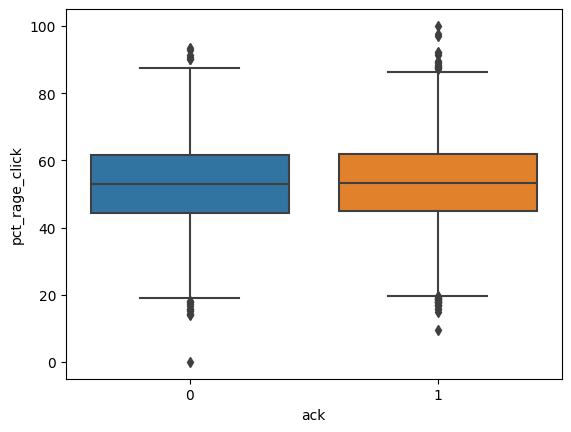

In [126]:
sns.boxplot(x='ack', y='pct_rage_click', data=cleaned_data)
plt.show()

V grafoch môžeme vidieť, že sa v dátach nachádzajú outliery, ktorých pre túto hypotézu odstránime

In [127]:
### prevzatá z vzorových notebookov
def identify_outliers(a):
    low = a.quantile(0.25) - 1.5 * stats.iqr(a)
    big = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > big) | (a < low)]

In [128]:
data1 = cleaned_data


ack1 = data1[data1['ack'] == 1]['pct_rage_click']
out = identify_outliers(ack1)
print(out)
ack1 = ack1.drop(out.index)


ack0 = data1[data1['ack'] == 0]['pct_rage_click']
out = identify_outliers(ack0)
print(out)
ack0 = ack0.drop(out.index)

29        88.00818
155       18.44934
1086      87.87584
1164      92.12047
1389      16.83826
1964      91.48973
1996      87.80481
2219      18.26300
2602      87.54707
3048      14.87432
3169      91.99498
3566      18.75617
4010      17.70559
4544     100.00000
4660      18.80095
4843      97.50333
4923      19.33781
5219      19.10793
5427      88.98112
5459      15.77933
5767      19.07820
5922      15.76753
6117      17.89617
7312      16.99477
7323      87.30342
7510      16.64065
7589      88.26643
8281      16.97821
8849      17.71352
9044      17.47092
9195      89.28968
9456      19.57920
9851      97.02976
9890      89.67727
10628      9.38975
Name: pct_rage_click, dtype: float64
1026     18.18293
1951     90.76496
2292     93.47204
2412     15.35239
3747     91.35384
3749     15.02482
4548     14.20737
4830     17.31812
6013     15.74359
6890     15.78061
7041      0.00000
7132     17.80635
7167     90.05189
7430     16.69635
7480     90.22293
7845     13.83819
9053     9

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_rage_click', ylabel='Count'>

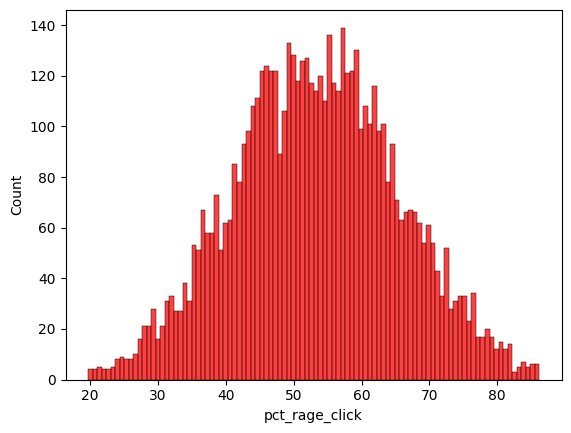

In [129]:
sns.histplot(ack1, bins=100, color='red')

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_rage_click', ylabel='Count'>

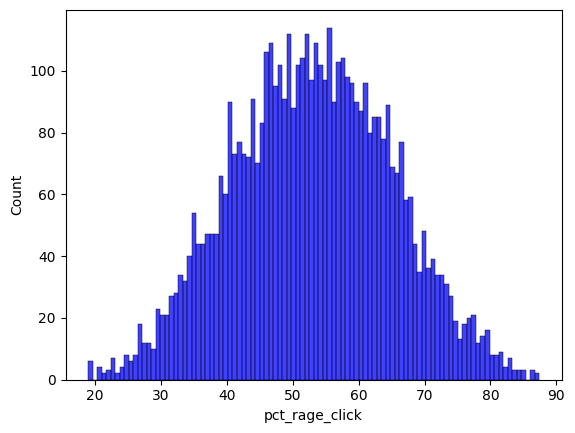

In [130]:
sns.histplot(ack0, bins=100, color='blue')

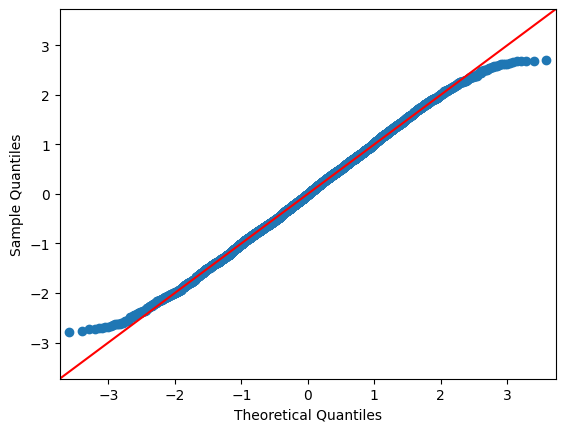

In [131]:
_ = sm.ProbPlot(ack1, fit=True).qqplot(line='45')

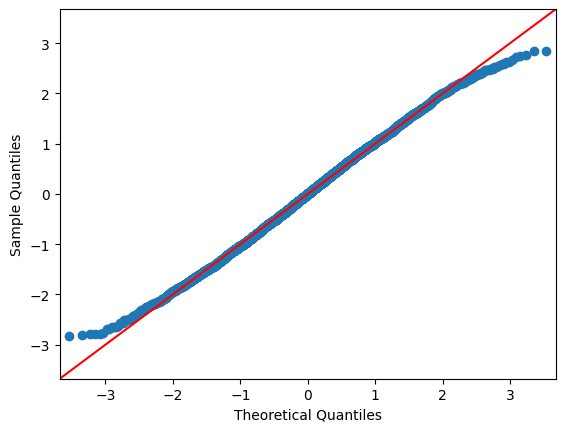

In [132]:
_ = sm.ProbPlot(ack0, fit=True).qqplot(line='45')

Podľa grafov môžeme vidieť, že dáta nie sú perfektne normálne distribuované, aj ked v strede sú, však konce nie sú.

**Text z cvičeni**<br />
Shapiro-Wilkov test testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia.<br />
Ak j p<0,05
, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdeleni<br />
. Ak  p>0,05 
, nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelen<br />ia.

In [133]:
stats.shapiro(ack1)

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.997953474521637, pvalue=4.035231881971413e-07)

In [134]:
stats.shapiro(ack0)

ShapiroResult(statistic=0.9977959394454956, pvalue=1.6351535805370077e-06)

p je menšie ako 0,05 v oboch prípadoch, čo znamená, že $H_0$ zamietame. Oba datasety pochádzajú pravdepodobne z iného ako normálového rozdelenia. Nespĺňame už prvú podmienku na parametrický test, takže nie je potrebné zisťovať varianciu. Musíme urobiť neparametrický test.

In [135]:
stats.mannwhitneyu(ack1, ack0)

MannwhitneyuResult(statistic=14928683.5, pvalue=0.1761977713556142)

p je väčšie ako 0,05, čo znamená, že nemôžeme zamietnuť $H_0$ a teda nemáme dôkaz o tom, že by existoval štatisticky významný rozdiel v pravdepodobnosti nákupu podľa rozdielu v priemernom počte atribútu pct_rage_click.

### **Hypotéza #2**

$H_0$: Hodnota `mouse_move_total_rel_distance` je rovnaká pre používateľov, ktorí si produkt nekúpili (ack=0) a pre tých, ktorí si produkt kúpili (ack=1).

$H_0A$: Hodnota `mouse_move_total_rel_distance` je vyššia, ak používateľ nakúpil produkt (ack=1), ako v prípade používateľa, ktorý si produkt nekúpil (ack=0).

Odfiltrujeme potrebné stĺpce:

In [136]:
hypoteza2=sessions[['mouse_move_total_rel_distance', 'ack']]
hypoteza2.head()

mouse_move_total_rel_distance  ack
0                       16.78128    0
1                       16.67535    1
2                       17.84916    1
3                       15.85436    0
4                       16.65385    0

We clean the data if it has some NaNs

In [137]:
cleaned_data2 = hypoteza2.dropna()
cleaned_data2.head()
print(cleaned_data2['mouse_move_total_rel_distance'].isna().sum())

0


/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


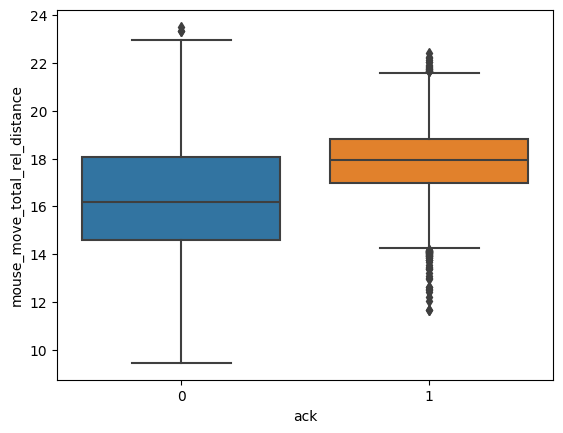

In [138]:
sns.boxplot(x='ack', y='mouse_move_total_rel_distance', data=cleaned_data2)
plt.show()

In [139]:
data2 = cleaned_data2

ack1 = data2[data2['ack'] == 1]['mouse_move_total_rel_distance']
out = identify_outliers(ack1)
print(out)
ack1 = ack1.drop(out.index)


ack0 = data2[data2['ack'] == 0]['mouse_move_total_rel_distance']
out = identify_outliers(ack0)
print(out)
ack0 = ack0.drop(out.index)

410      13.82664
451      13.93242
571      14.17604
656      21.67335
824      13.47543
           ...   
10028    13.95814
10062    12.50526
10152    13.84300
10249    21.66709
10499    14.11963
Name: mouse_move_total_rel_distance, Length: 61, dtype: float64
2978    23.34356
4063    23.34506
9482    23.50145
Name: mouse_move_total_rel_distance, dtype: float64


/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mouse_move_total_rel_distance', ylabel='Count'>

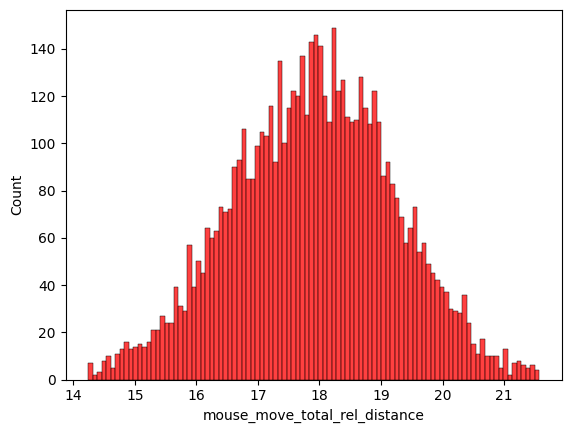

In [140]:
sns.histplot(ack1, bins=100, color='red')

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mouse_move_total_rel_distance', ylabel='Count'>

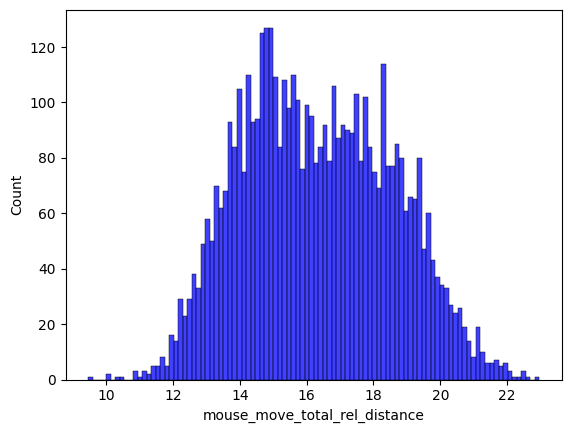

In [141]:
sns.histplot(ack0, bins=100, color='blue')

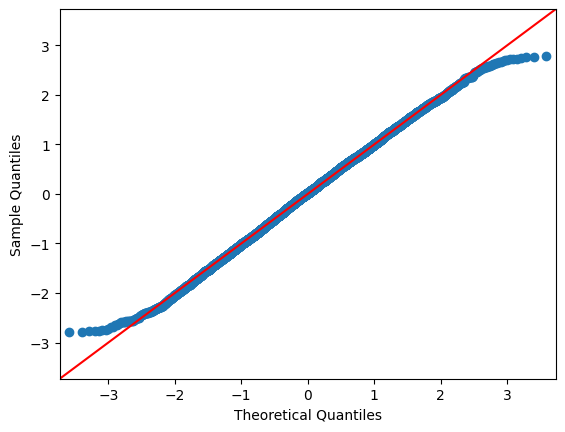

In [142]:
_ = sm.ProbPlot(ack1, fit=True).qqplot(line='45')

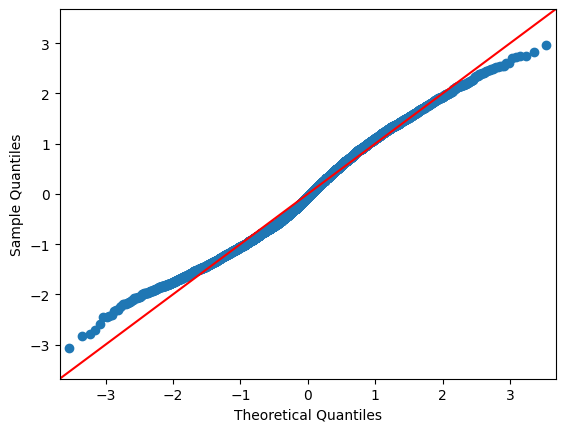

In [143]:
_ = sm.ProbPlot(ack0, fit=True).qqplot(line='45')

In [144]:
stats.shapiro(ack1)

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9983288049697876, pvalue=5.70964175494737e-06)

In [145]:
stats.shapiro(ack0)

ShapiroResult(statistic=0.9877681732177734, pvalue=2.6892161933156043e-20)

p je menšie ako 0,05 v oboch prípadoch, čo znamená, že $H_0$ zamietame. Oba datasety pochádzajú pravdepodobne z iného ako normálového rozdelenia. Nespĺňame už prvú podmienku na parametrický test tak ako v prvom hypoteze. Musíme urobiť neparametrický test.

In [146]:
stats.mannwhitneyu(ack1, ack0)

MannwhitneyuResult(statistic=21093221.0, pvalue=0.0)

Keďže $p < 0,001$, pravdepodobnosťže $H_0$ je pravdivá a my ju zamietame je menej ako 1 promile. Našu nulovú hypotézu $H_0$ teda zamietame v prospech alternatívnej hypotézy $H_A$. Z toho plýva že s rastom hodnoty `mouse_move_total_rel_distance` pocet zakúených tovarov sa zvýši.